# Combinatorial Optimization Benchmark Datasets

Examples of benchmark datasets for combinatorial optimization problems:

| Benchmark Dataset     | Description | Sources |
| --- | --- | --- |
| Traveling Salesman Problem (TSP) | Given a set of n nodes and distances for each pair of nodes, find a roundtrip of minimal total length visiting each node exactly once.  | <a href="https://github.com/coin-or/jorlib/tree/master/jorlib-core/src/test/resources/tspLib/tsp">tspLib/tsp</a> |
|Vehicle Routing Problem (VRP) | Determining the optimal routes and schedules for a fleet of vehicles to serve a set of customers or locations. | <a href="https://github.com/coin-or/jorlib/tree/master/jorlib-core/src/test/resources/tspLib/vrp">tspLib/vrp</a> and <a href="http://neumann.hec.ca/chairedistributique/data">Neumann</a>|
| Job shop scheduling (JSS) | JSS involves scheduling a set of jobs on a set of machines, where each job consists of multiple operations that must be processed on different machines in a specific order. The objective is to determine an optimal schedule that minimizes the makespan or total completion time of all jobs. | <a href="http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/jobshop1.txt">jobshop1/vrp</a> and <a href="http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/jobshop2.txt">jobshop2</a>|
| Assembly Line Balancing Problem (ALBP) | ALBP addresses assigning tasks (work elements) to workstations that minimizes the amount of the idle time of the line, while satisfying specific constraints. ALBP generally comprises all tasks and decisions which are related to equipping and aligning the productive units for a given production process, before the actual assembly process can start. This encompasses setting the system capacity, which includes cycle time, number of stations, and station equipment, as well as assigning work content to productive units, which includes task assignment and determining the sequence of operations. | <a href="https://assembly-line-balancing.de/">ALBP</a> |
|Quadratic Assignment Problem (QAP) | QAP addresses determining the optimal assignment of a set of facilities to a set of locations. It is widely studied in operations research and has applications in various fields such as facility layout design, manufacturing, logistics, and telecommunications. | <a href="http://mistic.heig-vd.ch/taillard/problemes.dir/qap.dir/qap.html">Gap</a> | 
| Knapsack |Given a set of n items, each item i has a weight w[i] and a value v[i]. You want to select a subset of these items such that the total weight of the selected items is less than or equal to a given weight limit W, and the total value of the selected items is as large as possible. | <a href="http://people.brunel.ac.uk/~mastjjb/jeb/orlib/mknapinfo.html">Knapsack</a>|
| Set covering problem (SCP) | Given a universe U of n elements, and a collection S of m sets whose union equals the universe, the set covering problem is to find the smallest sub-collection of S such that this sub-collection still covers all elements of the universe U | <a href="http://people.brunel.ac.uk/~mastjjb/jeb/orlib/scpinfo.html">Set covering </a>|
| Bin Packing Problem | Given a set of n items, each with a size s[i], and a bin capacity C, the problem is to allocate each item to one bin so that the total size of the items in each bin does not exceed C, and the number of bins used is minimized. |<a href="http://people.brunel.ac.uk/~mastjjb/jeb/orlib/binpackinfo.html">Bin Packing</a>|


## Traveling Salesman Problem (TSP)

Several instances of TSP are available here: https://github.com/coin-or/jorlib/tree/master/jorlib-core/src/test/resources/tspLib/tsp 

Header Information:
NAME: berlin52
TYPE: TSP
COMMENT: 52 locations in Berlin (Groetschel)
DIMENSION: 52
EDGE_WEIGHT_TYPE: EUC_2D



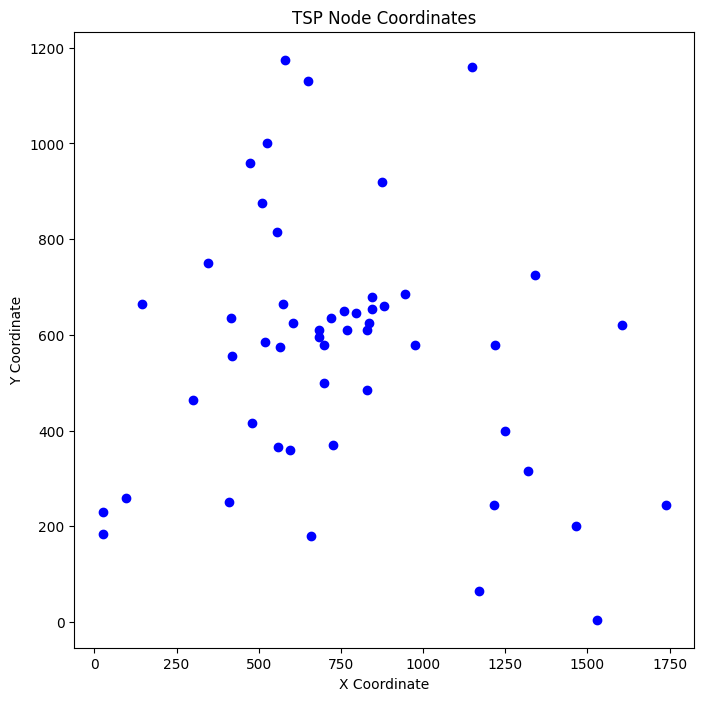

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL of the TSP benchmark dataset file
url = 'https://raw.githubusercontent.com/coin-or/jorlib/master/jorlib-core/src/test/resources/tspLib/tsp/berlin52.tsp'

# Fetch the contents of the URL
response = requests.get(url)

# Extract the header information
header = ""
lines = response.text.strip().split('\n')
for line in lines:
    if line.startswith('NAME') or line.startswith('TYPE') or line.startswith('COMMENT') or line.startswith('DIMENSION') or line.startswith('EDGE_WEIGHT_TYPE'):
        header += line.strip() + '\n'

# Print the header information
print("Header Information:")
print(header)

# Parse the TSP dataset file into a DataFrame
df = pd.read_csv(url, skiprows=6, delim_whitespace=True, names=['node', 'x', 'y'])

# Extract node coordinates from the DataFrame
node_coords = df[['x', 'y']].to_numpy()

# Visualize the node coordinates
x_coords = node_coords[:, 0]
y_coords = node_coords[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, color='blue', marker='o')
plt.title('TSP Node Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Vehicle Routing Problem (VRP)

Several instances of VRP are available here: https://github.com/coin-or/jorlib/tree/master/jorlib-core/src/test/resources/tspLib/vrp

Header Information:
NAME : eilA101
TYPE : CVRP
DIMENSION : 101
EDGE_WEIGHT_TYPE : EUC_2D



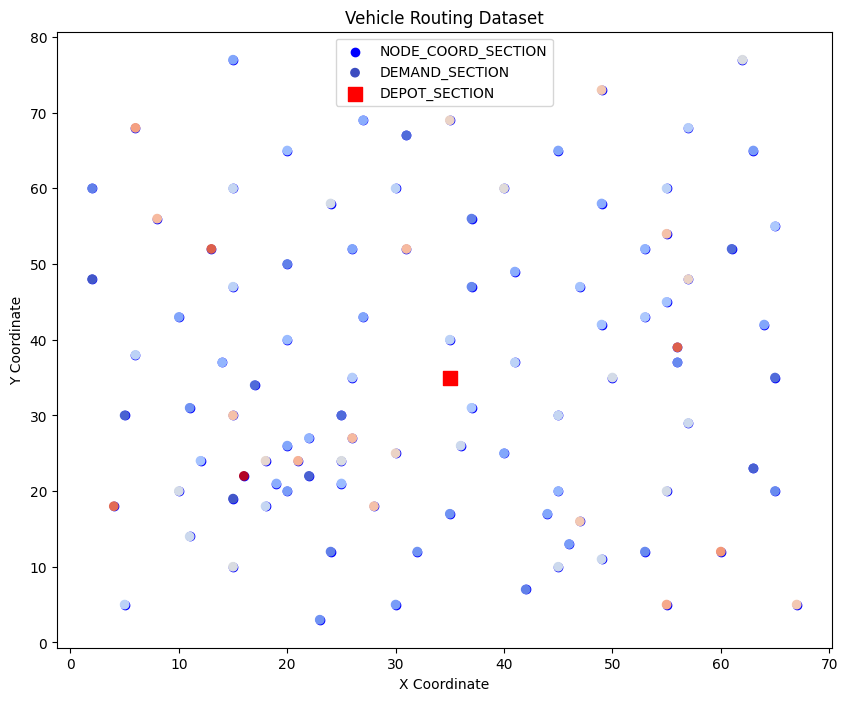

In [2]:
import requests
import matplotlib.pyplot as plt

# URL of the vehicle routing dataset file
url = 'https://raw.githubusercontent.com/coin-or/jorlib/master/jorlib-core/src/test/resources/tspLib/vrp/eilA101.vrp'

# Fetch the contents of the URL
response = requests.get(url)

# Extract the header information
header = ""
lines = response.text.strip().split('\n')
for line in lines:
    if line.startswith('NAME') or line.startswith('TYPE') or line.startswith('DIMENSION') or line.startswith('EDGE_WEIGHT_TYPE'):
        header += line.strip() + '\n'

# Print the header information
print("Header Information:")
print(header)

node_coords = []
demand_section = []
depot_section = []

section = None
for line in lines:
    if line.startswith('NODE_COORD_SECTION'):
        section = 'NODE_COORD_SECTION'
    elif line.startswith('DEMAND_SECTION'):
        section = 'DEMAND_SECTION'
    elif line.startswith('DEPOT_SECTION'):
        section = 'DEPOT_SECTION'
    elif line.startswith('EOF'):
        break
    elif section == 'NODE_COORD_SECTION':
        parts = line.split()
        x, y = map(float, parts[1:])
        node_coords.append((x, y))
    elif section == 'DEMAND_SECTION':
        demand = int(line.split()[1])
        demand_section.append(demand)
    elif section == 'DEPOT_SECTION':
        depot = int(line.split()[0])
        depot_section.append(depot)

# Visualize the sections
node_x = [coord[0] for coord in node_coords]
node_y = [coord[1] for coord in node_coords]

plt.figure(figsize=(10, 8))

# Visualize NODE_COORD_SECTION
plt.scatter(node_x, node_y, color='blue', label='NODE_COORD_SECTION')

# Visualize DEMAND_SECTION
plt.scatter(node_x, node_y, c=demand_section, cmap='coolwarm', label='DEMAND_SECTION')

# Visualize DEPOT_SECTION
plt.scatter(node_x[depot_section[0] - 1], node_y[depot_section[0] - 1], color='red', marker='s', s=100, label='DEPOT_SECTION')

plt.title('Vehicle Routing Dataset')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


# Job shop scheduling (JSS)

Several instances of JSS are available here: http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/

In [3]:
import requests

# URL of the Job Shop Scheduling benchmark dataset file
url = 'http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/jobshop1.txt'

# Fetch the contents of the URL
response = requests.get(url)
lines = response.text.strip().split('\n')
# Find the start and end indices of the instance "abz5"
start_index = None
end_index = None
for i, line in enumerate(lines):
    if line.startswith('abz5'):
        start_index = i
    elif start_index is not None and line.strip() == '':
        end_index = i
        break

# Extract the instance "abz5" lines
instance_lines = lines[start_index:end_index]

# Print the instance "abz5"
print("Instance abz5:")
for line in instance_lines:
    print(line)


Instance abz5:
This file contains a set of 82 JSP test instances.

These instances are contributed to the OR-Library by
Dirk C. Mattfeld (email dirk@uni-bremen.de) and 
Rob J.M. Vaessens (email robv@win.tue.nl).
 
o abz5-abz9 are from
   J. Adams, E. Balas and D. Zawack (1988),
   The shifting bottleneck procedure for job shop scheduling,
   Management Science 34, 391-401.
o ft06, ft10, and ft20 are from 
   H. Fisher, G.L. Thompson (1963), 
   Probabilistic learning combinations of local job-shop scheduling rules, 
     J.F. Muth, G.L. Thompson (eds.), 
     Industrial Scheduling, 
     Prentice Hall, Englewood Cliffs, New Jersey, 
   225-251.
o la01-la40 are from 
   S. Lawrence (1984),
   Resource constrained project scheduling: an experimental investigation of 
     heuristic scheduling techniques (Supplement), 
   Graduate School of Industrial Administration,
   Carnegie-Mellon University, Pittsburgh, Pennsylvania.
o orb01-orb10 are from 
   D. Applegate, W. Cook (1991),
   A comp

# Assembly Line Balancing Problem

* Visit the website https://assembly-line-balancing.de/.
* Look for a section or page on the website that provides access to the datasets.
* Check if there are any specific instructions or guidelines for accessing or downloading the datasets. Follow those instructions if available.
* Look for a "Download" or "Data" section on the website, which may contain links or options to download the datasets.
* Click on the appropriate link or button to download the desired dataset.

Sample data is available in Appendix B of the book's GitHub repo and can be read directly using URL begins with raw.

Input files for all precedence graphs included in the data sets of:

Scholl, Armin (1993): Data of Assembly Line Balancing Problems. 
  Schriften zur Quantitativen Betriebswirtschaftslehre 16/93, Th Darmstadt.

Format of in2-files:

line 1: number n of tasks

lines 2-n+1: integer task times

lines n+2,...: direct precedence relations in form "i,j"

last line: end mark "-1,-1" (optional)

In [4]:
import requests

# URL of the Assembly Line Balancing Problem dataset file
url = 'https://raw.githubusercontent.com/Optimization-Algorithms-Book/Code-Listings/main/Appendix%20B/data/ALBP/SALBP-data-sets/precedence%20graphs/MANSOOR.IN2'

# Fetch the contents of the URL
response = requests.get(url)

# Print the data
print("Assembly Line Balancing Problem Dataset:")
print(response.text)


Assembly Line Balancing Problem Dataset:
4
38
45
12
10
8
12
10
2
10
34
1,4
2,4
2,5
3,11
4,6
5,7
6,8
7,9
8,10
9,10
10,11
-1,-1



# Quadratic Assignment Problem (QAP)

Various instances of QAP are available here: http://mistic.heig-vd.ch/taillard/problemes.dir/qap.dir/qap.html

For example "bur26a" QAP benchmark dataset consists of 26 facilities and 26 locations. For each pair of facilities, there is a flow value that represents the interaction or movement between the facilities. Similarly, for each pair of locations, there is a distance value that represents the cost or distance between the locations.

In [5]:
import requests

# URL of the dataset file
url = 'https://coral.ise.lehigh.edu/wp-content/uploads/2014/07/data.d/bur26a.dat'

# Fetch the contents of the URL
response = requests.get(url)

# Extract the dataset contents
dataset = response.text

# Describe the dataset
lines = dataset.strip().split('\n')
header = lines[0]
data = lines[1:]

# Print the dataset description
print("Dataset Description:")
print("Header:")
print(header)
print("Data:")
for line in data:
    print(line)


Dataset Description:
Header:
26
Data:

53 66 66 66 66 53 53 53 53 53 73 53 53 53 66 53 53 53 53 85 73 73 73 73 53 53
66 53 66 66 66 53 53 53 53 53 53 73 53 53 66 53 53 53 53 73 85 73 73 73 53 53
66 66 53 66 66 53 53 53 53 53 53 53 73 53 66 53 53 53 53 73 73 85 73 73 53 53
66 66 66 53 66 53 53 53 53 53 53 53 53 73 73 53 53 53 53 73 73 73 85 85 53 53
66 66 66 66 53 53 53 53 53 53 53 53 53 53 73 53 53 53 53 73 73 73 85 85 53 53
53 53 53 53 53 53 66 66 66 66 53 53 53 53 53 73 73 53 53 53 53 53 53 53 85 85
53 53 53 53 53 66 53 66 66 66 53 53 53 53 53 73 73 53 53 53 53 53 53 53 85 85
53 53 53 53 53 66 66 53 66 66 53 53 53 53 53 66 53 73 53 53 53 53 53 53 73 73
53 53 53 53 53 66 66 66 53 66 53 53 53 53 53 66 53 53 73 53 53 53 53 53 73 73
53 53 53 53 53 66 66 66 66 53 53 53 53 53 53 66 53 53 53 53 53 53 53 53 73 73
66 66 66 66 66 53 53 53 53 53 53 53 53 53 66 53 53 53 53 73 73 73 73 73 53 53
66 66 66 66 66 53 53 53 53 53 53 53 53 53 66 53 53 53 53 73 73 73 73 73 53 53
66 66 66 66 66 53 53 53 5

# Knapsack Problem

In [6]:
import requests

# URL of the Knapsack dataset file
url = 'http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/mdmkp_ct1.txtl'

# Fetch the contents of the URL
response = requests.get(url)

# Print the data
print("Knapsack Dataset:")
print(response.text)

Knapsack Dataset:
15
100 5 
42 41 523 215 819 551 69 193 582 375 367 478 162 898 550 553 298 577 493 183 260 224 852 394 958 282 402 604 164 308 218 61 273 772 191 117 276 877 415 873 902 465 320 870 244 781 86 622 665 155 680 101 665 227 597 354 597 79 162 998 849 136 112 751 735 884 71 449 266 420 797 945 746 46 44 545 882 72 383 714 987 183 731 301 718 91 109 567 708 507 983 808 766 615 554 282 995 946 651 298 
509 883 229 569 706 639 114 727 491 481 681 948 687 941 350 253 573 40 124 384 660 951 739 329 146 593 658 816 638 717 779 289 430 851 937 289 159 260 930 248 656 833 892 60 278 741 297 967 86 249 354 614 836 290 893 857 158 869 206 504 799 758 431 580 780 788 583 641 32 653 252 709 129 368 440 314 287 854 460 594 512 239 719 751 708 670 269 832 137 356 960 651 398 893 407 477 552 805 881 850 
806 361 199 781 596 669 957 358 259 888 319 751 275 177 883 749 229 265 282 694 819 77 190 551 140 442 867 283 137 359 445 58 440 192 485 744 844 969 50 833 57 877 482 732 968 113 486 7

# Set covering problem (SCP) 

In [7]:
import requests

# URL of the Linear Programming Problems dataset file
url = 'http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/lpopt.txt'

# Fetch the contents of the URL
response = requests.get(url)

# Extract the dataset contents
dataset = response.text

# Describe the dataset
lines = dataset.strip().split('\n')
header = lines[0]
data = lines[1:]

# Print the data
print("set covering problem (SCP) Dataset:")
print("Header:")
print(header)
print("Data:")
for line in data:
    print(line)

set covering problem (SCP) Dataset:
Header:
Data file   Optimal solution value
Data:
scp51       251.225 (lscp)
            365.77113 (lspp)
scp52       299.76111 (lscp)
            441.68704 (lspp)
scp53       233 (lscp)
            376.25957 (lspp)
scp54       240.5 (lscp)
            361.00461 (lspp)
scp55       211 (lscp)
            384.25652 (lspp)
scp56       212.5 (lscp)
            360.66296 (lspp)
scp57       291.77778 (lscp)
            436.67970 (lspp)
scp58       289 (lscp)
            416.13237 (lspp)
scp59       279 (lscp)
            432.37168 (lspp)
scp510      288 (lscp)
            448.11734 (lspp)
scp61       133.13960 (lscp)
            298.63603 (lspp)
scp62       140.45652 (lscp)
            313.91211 (lspp)
scp63       140.13402 (lscp)
            315.26256 (lspp)
scp64       129 (lscp)
            302.47962 (lspp)
scp65       153.35287 (lscp)
            337.73575 (lspp)


# Bin Packing Problem

In [8]:
import requests

# URL of the Bin Packing dataset file
url = 'http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/binpack1.txt'

# Fetch the contents of the URL
response = requests.get(url)

# Print the data
print("Bin Packing Dataset:")
print(response.text)

Bin Packing Dataset:
20
 u120_00 
 150 120 48
42
69
67
57
93
90
38
36
45
42
33
79
27
57
44
84
86
92
46
38
85
33
82
73
49
70
59
23
57
72
74
69
33
42
28
46
30
64
29
74
41
49
55
98
80
32
25
38
82
30
35
39
57
84
62
50
55
27
30
36
20
78
47
26
45
41
58
98
91
96
73
84
37
93
91
43
73
85
81
79
71
80
76
83
41
78
70
23
42
87
43
84
60
55
49
78
73
62
36
44
94
69
32
96
70
84
58
78
25
80
58
66
83
24
98
60
42
43
43
39
 u120_01 
 150 120 49
97
57
81
62
75
81
23
43
50
38
60
58
70
88
36
90
37
45
45
39
44
53
70
24
82
81
47
97
35
65
74
68
49
55
52
94
95
29
99
20
22
25
49
46
98
59
98
60
23
72
33
98
80
95
78
57
67
53
47
53
36
38
92
30
80
32
97
39
80
72
55
41
60
67
53
65
95
20
66
78
98
47
100
85
53
53
67
27
22
61
43
52
76
64
61
29
30
46
79
66
27
79
98
90
22
75
57
67
36
70
99
48
43
45
71
100
88
48
27
39
 u120_02 
 150 120 46
38
100
60
42
20
69
24
23
92
32
84
36
65
84
34
68
64
33
69
27
47
21
85
88
59
61
50
53
37
75
64
84
74
57
83
28
31
97
61
36
46
37
96
80
53
51
68
90
64
81
66
67
80
37
92
67
64
31
94
45
80
28
7